## 1 Self Organizing Maps
Self-organizing maps (SOM) are a class of unsupervised learning neural networks used for feature detection. SOM are used to project a high dimensional data into a smaller set and are used for dimensionality reduction.

SOMs differ from conventional artificial neural networks as they apply competitive learning when compared to error correlated learning, which involves backpropagation and gradient descent. In SOM, the training data has no labels and the map learns to differentiate and distinguish features based on similarities.

SOM Algorithm
- Step 1: Initialize weights $w_{i j}$
- Step 2: Calculate distance $\$ \mathrm{~d}_{i j}=\sum\left(w_{i j}-x_i\right)^2$
- Step 3: Calcualte $w_{i j}(t+1)=w_{i j}(t)+\theta(t) \cdot \alpha(t) \cdot\left(x_i(t)-w_{i j}(t)\right)$
where $x_i(t)$ is the characteristics of the samples, $\alpha(t)$ is a learning rate and $\theta(t)$ is the neighbourhood function.

The weights are adjusted iteratively from the Euclidean distance by updating the learning rate. The neuron whose weight vector is most similar to the input is called the best matching unit (BMU). Once the BMU has been determined, we then calculate which of the other nodes are within the BMU's neighborhood. Nodes found within the radius are deemed to be inside the neighborhood of the BMU. This process is repeated until convergence or number of iterations.

## 2 Implementation

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import random
# SOM & Sklearn library
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
# Visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# set seed
random.seed(2022)
np.random.seed(2022)


### 2.1 Load Data

In [6]:
# Read cluster file saved locally
df = pd.read_csv('data/cluster_new.csv', index_col=0)
df


,Cluster,Companies Name,Companies,ATR,CHG
0,0,3M,MMM,1.543366,0.001926
1,0,American Express,AXP,1.705368,0.003270
2,0,Travelers,TRV,1.540084,0.002900
3,0,McDonald's,MCD,1.800405,0.003009
4,0,JPMorgan Chase,JPM,1.447497,0.002857
5,0,Johnson & Johnson,JNJ,1.341785,0.002405
6,0,Honeywell,HON,1.813250,0.003404
7,1,Boeing,BA,4.254814,0.003214
8,2,Verizon,VZ,0.521812,0.002012
9,2,Intel,INTC,0.720293,0.002433


### 2.2 Define Feature Matrix


In [7]:
# Define feature matrix
X = df[['ATR', 'CHG']]
# Transfor feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X


array([[0.29562641, 0.14593056],
       [0.33771084, 0.45599287],
       [0.29477393, 0.37064959],
       [0.3623994 , 0.39583922],
       [0.27072186, 0.36067423],
       [0.24326019, 0.25656426],
       [0.36573629, 0.48706492],
       [1.        , 0.44308828],
       [0.03024963, 0.16570197],
       [0.08181049, 0.2629807 ],
       [0.        , 0.19870093],
       [0.02269938, 0.2154935 ],
       [0.03709108, 0.17982999],
       [0.76762244, 0.89082977],
       [0.92136781, 0.17813544],
       [0.35456911, 0.        ],
       [0.58562379, 0.4557955 ],
       [0.61888415, 0.72887313],
       [0.37523145, 0.69247241],
       [0.39435134, 0.66990569],
       [0.52357435, 0.78322051],
       [0.50056644, 0.46114507],
       [0.1648185 , 1.        ],
       [0.260304  , 0.92011503],
       [0.22121435, 0.59587851],
       [0.18103383, 0.21374148],
       [0.10856696, 0.27920033],
       [0.30029878, 0.31660263],
       [0.36530479, 0.31816338]])

### 2.3 Train SOM


In [9]:
# Initialize a 15x15 SOM - Thumb rule is 5 * sqrt(n) > 5x5 SOM
som = MiniSom(15, 15, 2, learning_rate=0.5, sigma=5, random_seed=42)
# Initialize with randon weights
som.random_weights_init(X)
# Trains SOM with 10000 iterations
som.train_batch(X,10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.022239690140889525


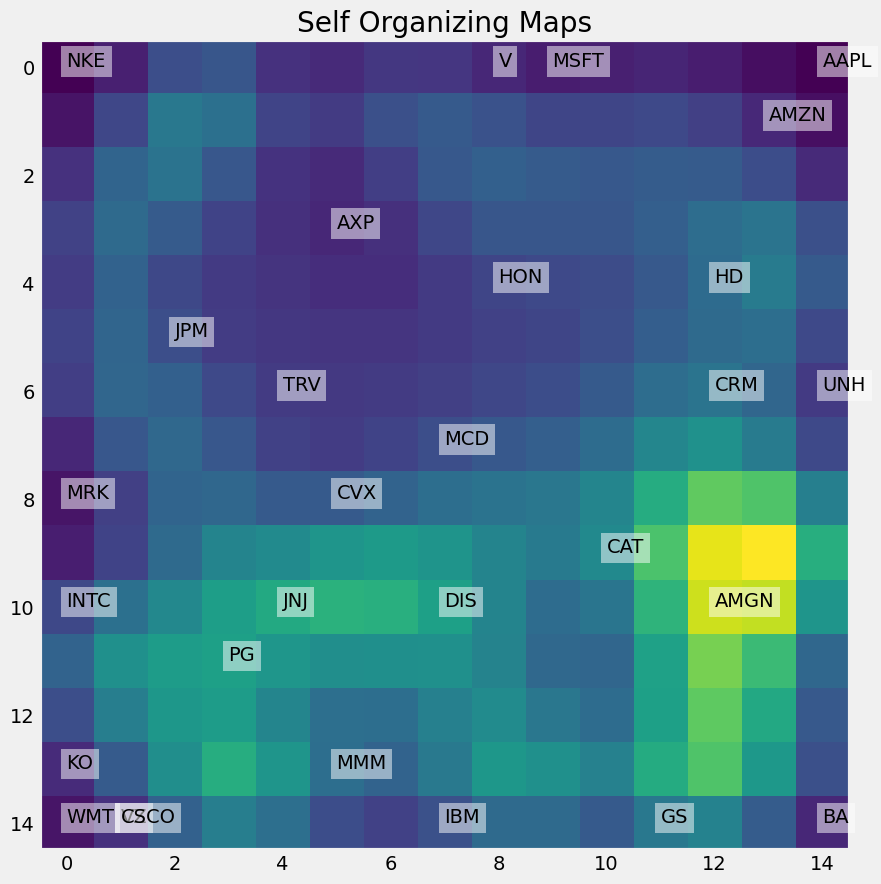

In [10]:
# Plot SOM
plt.figure(figsize=(20, 10))
for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], winner[1], df.Companies[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.imshow(som.distance_map())
plt.grid(False)
plt.title('Self Organizing Maps');


Result of training the SOM with feature set X and labelling it at their respective SOM neurons

In [12]:
# List the corresponding companies
for ix in range(len(X)):
    winner = som.winner(X[ix])
    print(winner[0], winner[1], df['Companies Name'][ix])

5 13 3M
5 3 American Express
4 6 Travelers
7 7 McDonald's
2 5 JPMorgan Chase
4 10 Johnson & Johnson
8 4 Honeywell
14 14 Boeing
1 14 Verizon
0 10 Intel
0 14 Walmart
0 13 Coca-Cola
1 14 Cisco
14 6 UnitedHealth Group
11 14 Goldman Sachs
7 14 IBM
12 10 Amgen
12 6 Salesforce
9 0 Microsoft
8 0 Visa
12 4 Home Depot
10 9 Caterpillar
14 0 Apple
13 1 Amazon
0 0 Nike
3 11 Procter & Gamble
0 8 Merck
5 8 Chevron
7 10 Disney
